# EV Charging Station Exploration

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cf


In [19]:
evdata = pd.read_csv('alt_fuel_stations (Mar 18 2025).csv')
evdata1 = pd.read_csv("EV_charger_data.csv")

In [20]:
geoevpoints = gpd.GeoDataFrame(evdata, geometry = gpd.points_from_xy(evdata.Longitude, evdata.Latitude), crs = "EPSG:4326") 
geoevpoints1 = gpd.GeoDataFrame(evdata1, geometry = gpd.points_from_xy(evdata1.Longitude, evdata1.Latitude), crs = "EPSG:4326") 

In [21]:
#va_map = gpd.read_file('virginiamap.shp', SHAPE_RESTORE_SHX = 'yes')

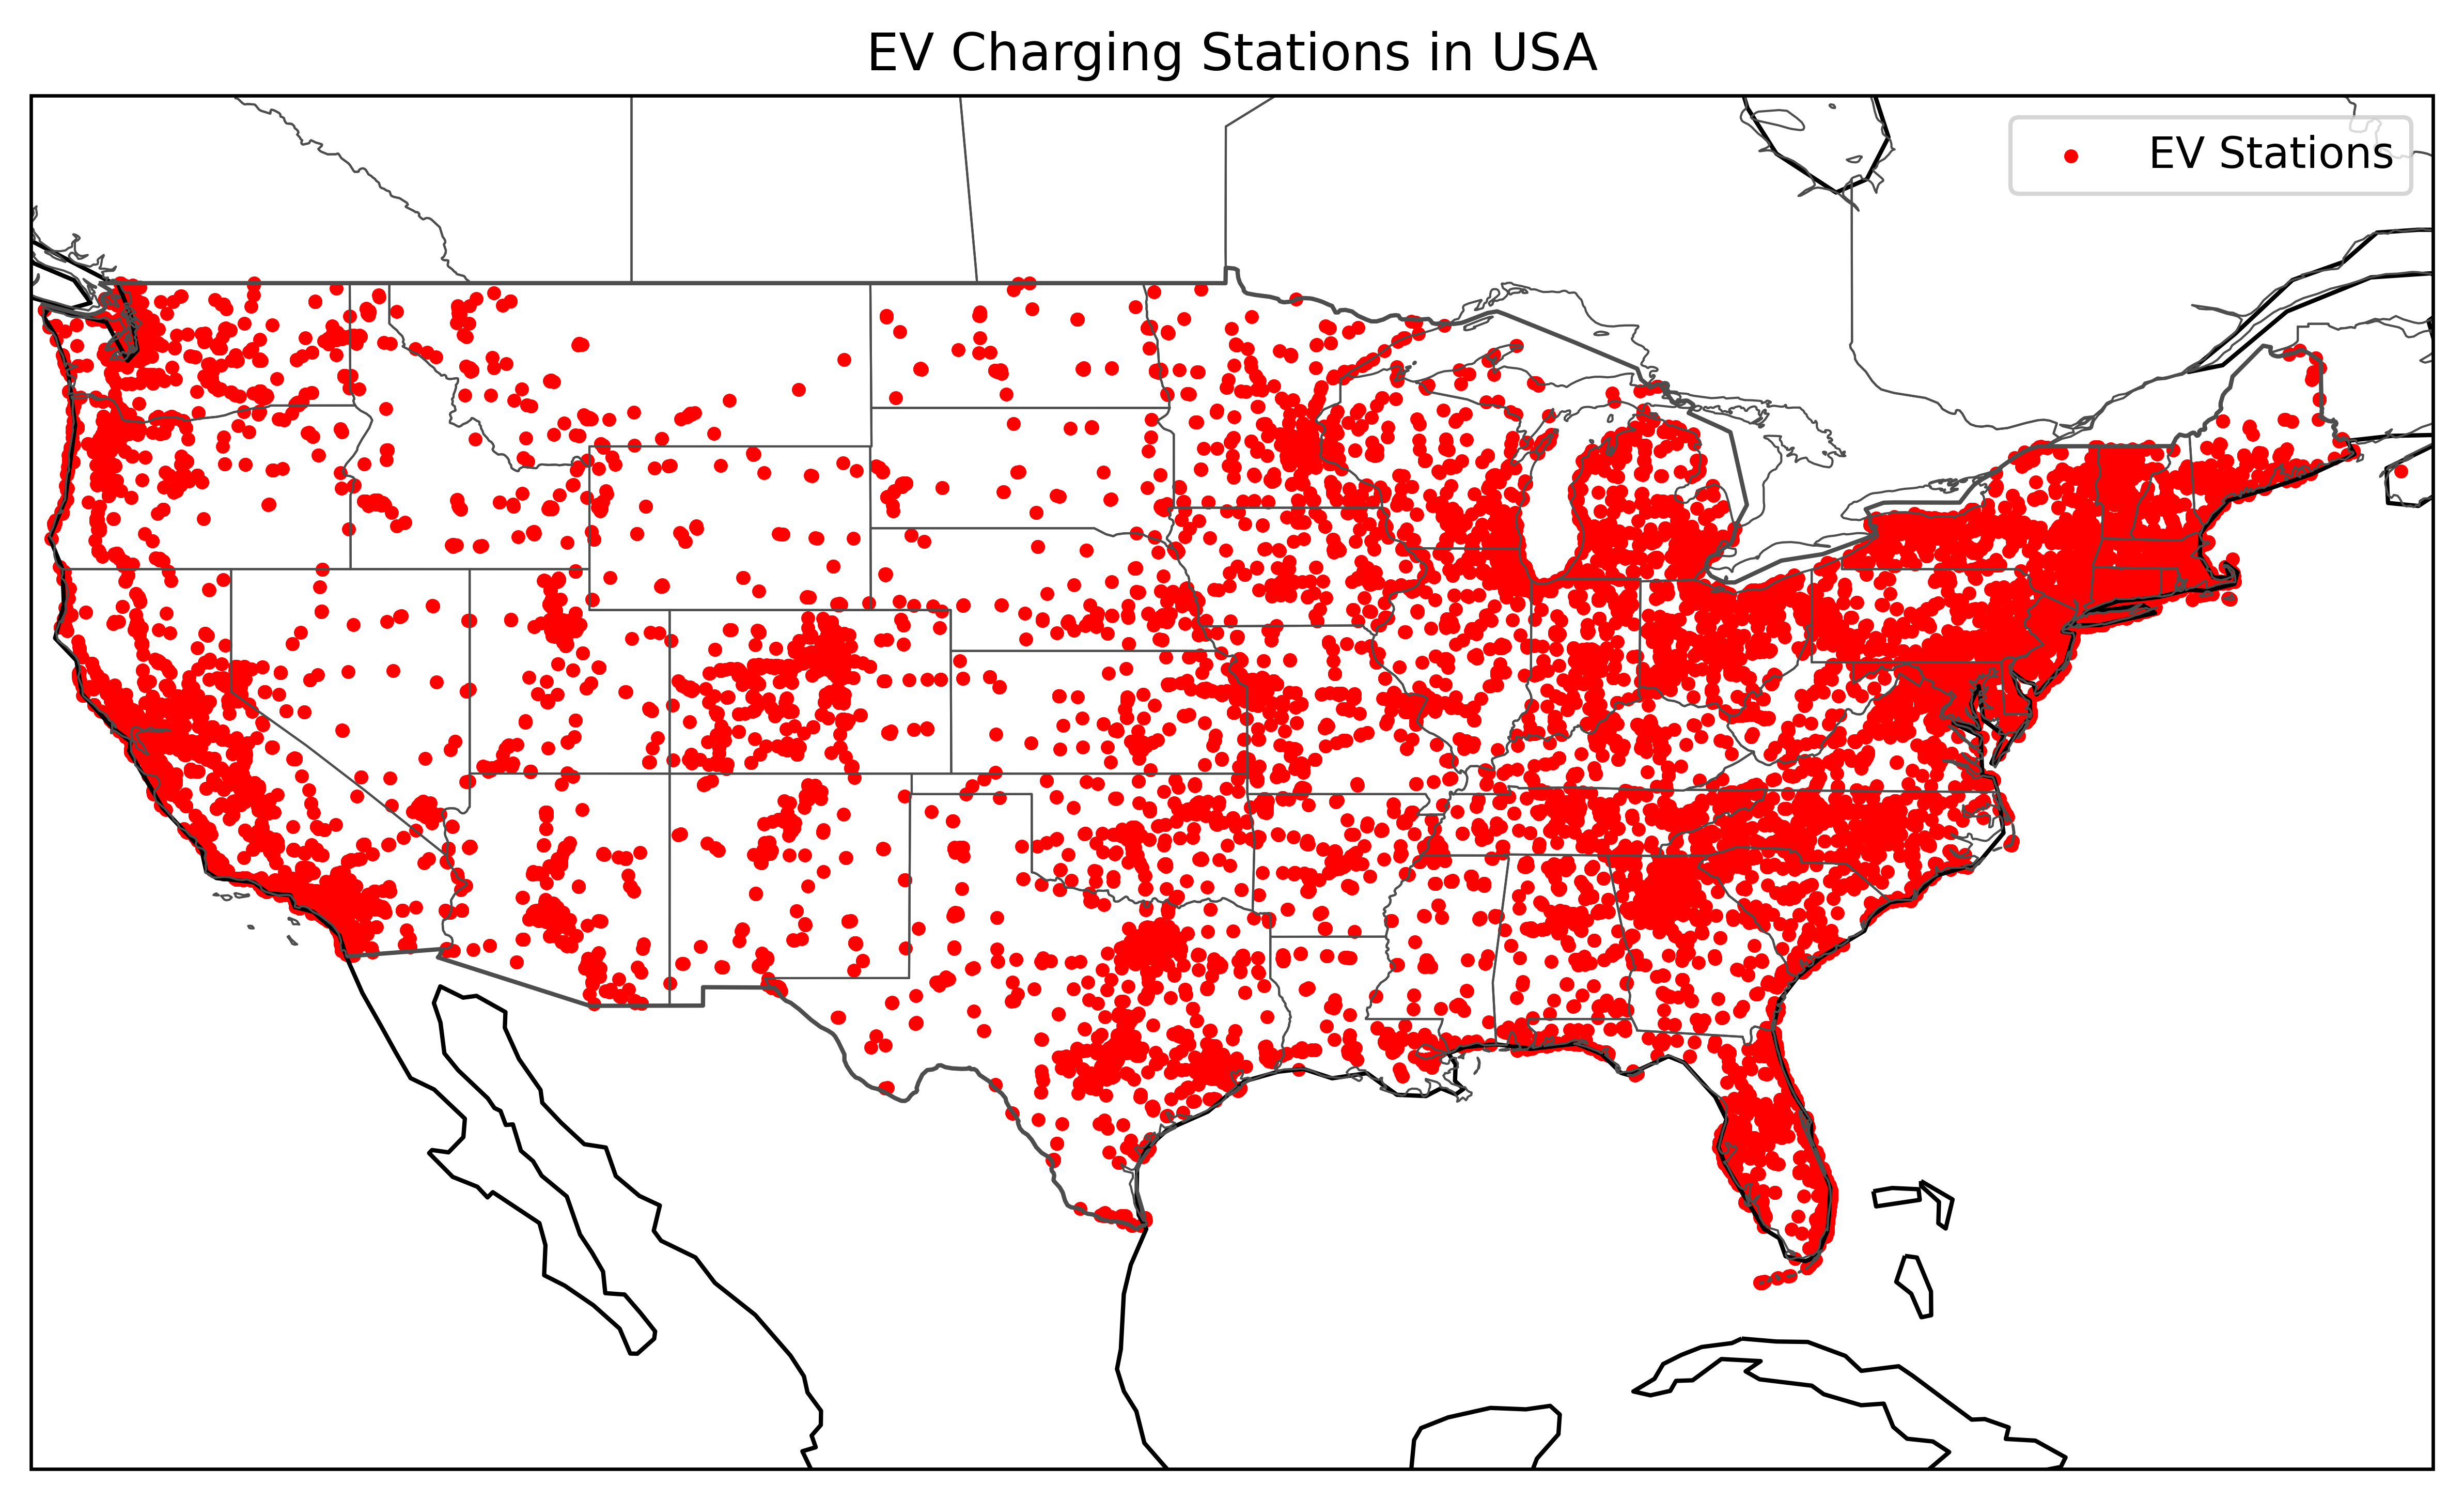

In [26]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6), dpi=600)  # Adjust DPI for resolution
#va_map.plot(ax=ax, color='lightgray', edgecolor='black')  # Virginia map
geoevpoints1.plot(ax=ax, markersize=5, color='red', alpha=1, label="EV Stations")  # Plot stations\
plt.title("EV Charging Stations in USA")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(False)

ax.coastlines(resolution='110m')
ax.add_feature(cf.BORDERS.with_scale('50m'),edgecolor=[.3,.3,.3],linewidth=1) 
ax.add_feature(cf.STATES.with_scale('50m'), edgecolor=[.3,.3,.3], linewidth=.5)

ax.set_extent((-125,-65,20,50))


In [2]:
from PIL import Image
import time

In [28]:
img = Image.open("output.png")
width, height = img.size

c:\Python312\Lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (162067610 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [29]:
tile_width = 1000
tile_height = 1000

num_tiles_x = width // tile_width
num_tiles_y = height // tile_height

In [ ]:
for i in range(num_tiles_y):
    for j in range(num_tiles_x):
        left = j * tile_width
        top = i * tile_height
        right = (j + 1) * tile_width
        bottom = (i + 1) * tile_height
        
        tile = img.crop((left, top, right, bottom))
        tile.show()
        #tile.save(f"tile_{i}_{j}.png")
        time.sleep(1)

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio
from rasterio.plot import show
import numpy as np

In [4]:
with rasterio.open("Annual_NLCD_LndCov_2019_CU_C1V0 (1).tif") as src:
    scale = 100
    data = src.read(
        1,
        out_shape=(
            src.height // scale,
            src.width // scale
        )
    )
    unique_values = np.unique(data)  # Get unique values in the dataset

print("Unique values in raster:", unique_values)

Unique values in raster: [ 11  12  21  22  23  24  31  41  42  43  52  71  81  82  90  95 250]


In [5]:
data_cleaned = np.where(data == 250, np.nan, data)
data_cleaned

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

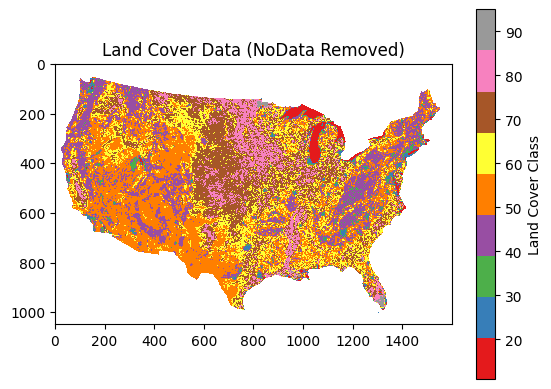

In [8]:
plt.imshow(data_cleaned, cmap="Set1", origin="upper")
plt.colorbar(label="Land Cover Class")
plt.title("Land Cover Data (NoData Removed)")
plt.show()